In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
import seaborn as sns
from matplotlib import pyplot as plt

#!pip install bayesian-optimization
#!pip install torch
#!pip install pyro


|Variable|Erklärung|Anmerkung|
|:---|:---|:---|
Age|Age of the patient|
Sex|Sex of the patient
exang|exercise induced angina (1 = yes; 0 = no)|Hat man Engegefühl wenn man Sport macht?
caa|number of major vessels (0-3)|weglassen, da Beschreibung uneindeutig, Skala passt auch nicht [0-3] 
cp|Chest Pain type chest pain type|Value 1: typical angina<br>Value 2: atypical angina<br>Value 3: non-anginal pain<br>Value 4: asymptomatic
trtbps|resting blood pressure (in mm Hg): Blutdruck bei Ruhe
chol|cholestoral in mg/dl fetched via BMI sensor|Cholesterinspiegel
fbs|(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)|Erhöhter Blutzucker
rest_ecg|resting electrocardiographic results|Value 0: normal<br>Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)<br>Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach|maximum heart rate achieved: Puls
target|0= less chance of heart attack 1= more chance of heart attack

In [2]:
# Datenset laden
# https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset
fulldata = pd.read_csv("heart.csv")

In [3]:
# Datentypen anpassen
cols = [
    "sex",
    "cp",
    "restecg",
    "output"
]

for col in cols:
    fulldata[col] = fulldata[col].astype("category")
    
cols = [
    "exng"
    "fbs"
]

for col in cols:
    fulldata[col] = fulldata[col].astype("bool")

In [4]:
#https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset
fulldata = pd.read_csv("heart.csv")
#data = fulldata.drop(['cp', 'restecg', 'output'], axis=1)
data = fulldata.drop(['output'], axis=1)
output = fulldata['output']
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [5]:
from sklearn.model_selection import train_test_split

# load data
X, y = data, output


# split the data into 2 sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(227, 13) (227,)
(76, 13) (76,)


In [6]:
from sklearn.model_selection import cross_val_score

result_array = []
# warum keine precomputed method?
methods = ["linear", "poly", "rbf", "sigmoid"]
k = 10
for i, element in enumerate(methods):
    method = methods[i] 
    clf = svm.SVC(kernel=method, C=1, random_state=42)
    scores = cross_val_score(clf, data, output, cv=k)
    result_array.append((scores.mean(), method))
result_array

[(0.8348387096774192, 'linear'),
 (0.663763440860215, 'poly'),
 (0.6604301075268817, 'rbf'),
 (0.5411827956989248, 'sigmoid')]

In [7]:
#clf = svm.SVC(kernel=linear, C=1, random_state=42)
#scores = cross_val_score(clf, data, output, cv=k)

param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']}]

from sklearn.model_selection import GridSearchCV

# create a SVC and optimize it with a grid search
svc = svm.SVC()
clf = GridSearchCV(svc, param_grid)
clf.fit(data, output)

# get the best estimator
clf.best_estimator_

SVC(C=1, kernel='linear')

In [ ]:
k = 5
clf = svm.SVC(kernel="linear", C=1, random_state=42)
scores = cross_val_score(clf, data, output, cv=k)
scores.mean()

In [8]:
k = 10
clf = svm.SVC(kernel="linear", C=0.0001, random_state=42)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))


0.6973684210526315


In [9]:
def black(C):
    # C: SVC hyper parameter to optimize for.
    #model = SVC(C = C, kernel="linear" )
    model = svm.SVC(kernel="linear", C=C, random_state=42)
    model.fit(X_train, y_train)
    
    #from sklearn.metrics import accuracy_score 
    #data["predicted"] = model.predict(data) 
    #f = accuracy_score(y_true = fulldata["output"], y_pred = data["predicted"])
    
    
    
    #f = model.score(X_test, y_test)
    #model.fit(X_train_scaled, y_train)
    #model.fit(X_train, y_train)
    #y_score = model.decision_function(X_test_scaled)
    #y_score = model.decision_function(X_test)
    #f = roc_auc_score(y_test, y_score)
    #y_score = model.decision_function(X_test)
    f = model.score(X_test, y_test)
    return f

In [10]:
black(30.93)

0.8552631578947368

In [11]:
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [12]:
print(np.array(data))

[[63.  1.  3. ...  0.  0.  1.]
 [37.  1.  2. ...  0.  0.  2.]
 [41.  0.  1. ...  2.  0.  2.]
 ...
 [68.  1.  0. ...  1.  2.  3.]
 [57.  1.  0. ...  1.  1.  3.]
 [57.  0.  1. ...  1.  1.  2.]]


In [13]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from bayes_opt import BayesianOptimization, UtilityFunction
import warnings
warnings.filterwarnings("ignore")


scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(np.array(X_train))
X_test_scaled = scaler.transform(np.array(X_test))
# Define the black box function to optimize.

def black_box_function(C):
    k=10
    model = svm.SVC(kernel="linear", C=C, random_state=42)
    model.fit(X_train, y_train)
    scores = cross_val_score(model, data, output, cv=k)
    f = scores.mean()
    return f
def black_box_function_onlyscore(C):
    # C: SVC hyper parameter to optimize for.
    #model = SVC(C = C, kernel="linear" )
    
    model = svm.SVC(kernel="linear", C=C, random_state=42)
    model.fit(X_train, y_train)
    
    #from sklearn.metrics import accuracy_score 
    #fulldata["predicted"] = model.predict(data) 
    #f = accuracy_score(y_true = fulldata["output"], y_pred = fulldata["predicted"])
    #model.fit(X_train_scaled, y_train)
    #model.fit(X_train, y_train)
    #y_score = model.decision_function(X_test_scaled)
    #y_score = model.decision_function(X_test)
    #f = roc_auc_score(y_test, y_score)
    #y_score = model.decision_function(X_test)
    f = model.score(X_test, y_test)
    return f

def black_box_functionorigi(C):
    # C: SVC hyper parameter to optimize for.
    model = SVC(C = C, kernel="linear", random_state=42 )
    
    #model.fit(X_train_scaled, y_train)
    model.fit(X_train, y_train)
    #y_score = model.decision_function(X_test_scaled)
    y_score = model.decision_function(X_test)
    f = roc_auc_score(y_test, y_score)
    #y_score = model.decision_function(X_test)
    #f = model.score(X_train, y_train)
    return f
# Set range of C to optimize for.
# bayes_opt requires this to be a dictionary.
pbounds = {"C": [1, 100]}
# Create a BayesianOptimization optimizer,
# and optimize the given black_box_function.
optimizer_acc = BayesianOptimization(f = black_box_function,
                                 pbounds = pbounds, verbose = 2,
                                 random_state = 42)
optimizer_acc.maximize(init_points = 10, n_iter = 10)
print("Best result: {}; f(x) = {}.".format(optimizer_acc.max["params"], optimizer_acc.max["target"]))

|   iter    |  target   |     C     |
-------------------------------------
|  1        |  0.8219   |  38.08    |
|  2        |  0.8119   |  95.12    |
|  3        |  0.8151   |  73.47    |
|  4        |  0.8086   |  60.27    |
|  5        |  0.8085   |  16.45    |
|  6        |  0.8085   |  16.44    |
|  7        |  0.8184   |  6.75     |
|  8        |  0.8086   |  86.75    |
|  9        |  0.8152   |  60.51    |
|  10       |  0.8119   |  71.1     |
|  11       |  0.8153   |  38.29    |
|  12       |  0.8119   |  37.92    |
|  13       |  0.8251   |  38.16    |
|  14       |  0.8184   |  6.917    |
|  15       |  0.8216   |  6.555    |
|  16       |  0.8117   |  6.407    |
|  17       |  0.8184   |  6.637    |
|  18       |  0.8184   |  7.085    |
|  19       |  0.8184   |  7.261    |
|  20       |  0.8184   |  7.433    |
Best result: {'C': 38.15547636082072}; f(x) = 0.825136612021858.


In [14]:
optimizer_acc.max["params"].get("C")

38.15547636082072

In [15]:
k=10
model = svm.SVC(kernel="linear", C=73.17, random_state=42)
model.fit(X_train, y_train)
scores = cross_val_score(model, data, output, cv=k)
scores.mean()

0.8350537634408604

In [16]:
scores


array([0.87096774, 0.74193548, 0.87096774, 0.9       , 0.83333333,
       0.86666667, 0.86666667, 0.9       , 0.73333333, 0.76666667])

## False Negatives verringern
### Überblick verschaffen
Für unseren Anwendungsfall sind False Negatives besonders fatal, weshalb sie möglichst gering sein soll.

Als False Negatives werden Ergebnisse bezeichnet, die als fälschlicherweise als negativ bewertet wurden, ob wohl der Test in Wahrheit positiv ist.

Zunächst werden die Ausgangs-Werte bestimmt.
Anschließend wird die Gewichtung verändert.
Dadurch werden die Ergebnisse "pessimistischer", also es wird eher ein mögliches Risiko ausgegeben.

Die für eine bessere Genauigkeit sind mehr Daten notwendig. 

In [17]:

clf = svm.SVC(kernel="linear", C=optimizer_acc.max["params"].get("C"), random_state=42)
clf.fit(X_train, y_train)

SVC(C=38.15547636082072, kernel='linear', random_state=42)

In [18]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(data, suptitle):
    fig, ax = plt.subplots(1, 2, figsize=(9, 3))
    fig.suptitle(suptitle)
    
    _ = sns.heatmap(data, cmap ='binary', annot = True, fmt="d", ax=ax[0]) \
        .set(xlabel = "True label", ylabel = "Predicted label")
    
    _ = sns.heatmap(data / data.sum(), cmap ='binary', annot = True, fmt=".2%", ax=ax[1]) \
        .set(xlabel = "True label", ylabel = "Predicted label")
    
    # Zusammenaddiert für convenience
    float_formatter = "{:.2%}".format
    print("Richtig klassifiziert:", float_formatter((data[0][0] + data[1][1]) / data.sum()))
    print("Falsch klassifiziert:", float_formatter((data[1][0] + data[0][1]) / data.sum()))
    
    plt.show()

SVC(C=38.15547636082072, kernel='linear', random_state=42)
Richtig klassifiziert: 84.58%
Falsch klassifiziert: 15.42%


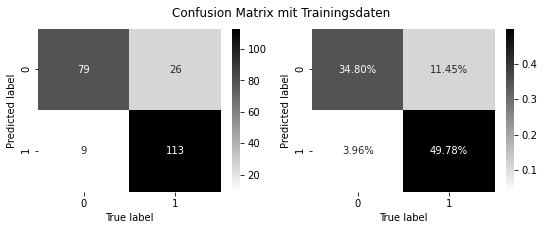

Richtig klassifiziert: 85.53%
Falsch klassifiziert: 14.47%


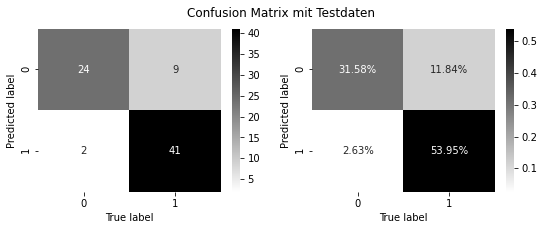

In [19]:
print(clf)
plot_confusion_matrix(confusion_matrix(y_train, clf.predict(X_train)), "Confusion Matrix mit Trainingsdaten")
plot_confusion_matrix(confusion_matrix(y_test, clf.predict(X_test)), "Confusion Matrix mit Testdaten")

In [20]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix
from bayes_opt import BayesianOptimization, UtilityFunction
import warnings
warnings.filterwarnings("ignore")

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(np.array(X_train))
X_test_scaled = scaler.transform(np.array(X_test))
# Define the black box function to optimize.

def black_box_function(zeroWeight):
    """

    Parameters
    ----------
    zeroWeight: hyper parameter to optimize for
    """
    
    # KI trainieren
    model = svm.SVC(kernel="linear", C=optimizer_acc.max["params"].get("C"), class_weight={0: zeroWeight, 1: 1})
    model.fit(X_train, y_train)
    matrix = confusion_matrix(y_train, model.predict(X_train))
    
    true_negative = matrix[0][0]
    true_positive = matrix[1][1]
    false_negative = matrix[0][1]
    false_negative_relative = false_negative / matrix.sum()
    accuracy = (true_positive + true_negative) / matrix.sum()
    
    # accuracy wird mit berücksichtigt, um zu verhindern, dass alle Herzpatienten sind
    gewichtung = .5 # getestet, liefert gute Ergebnisse
    f = gewichtung * accuracy + (1 - gewichtung) * (1 - false_negative_relative) # Gegenwert zur 1, weil maximiert wird
    return f

# Set range of C to optimize for.
# bayes_opt requires this to be a dictionary.
pbounds = {"zeroWeight": [1, 5]}
# Create a BayesianOptimization optimizer,
# and optimize the given black_box_function.
optimizer_weight = BayesianOptimization(f = black_box_function,
                                 pbounds = pbounds, verbose = 2
                                 )
optimizer_weight.maximize(init_points = 10, n_iter = 10)
print("Best result: {}; f(x) = {}.".format(optimizer_weight.max["params"], optimizer_weight.max["target"]))

|   iter    |  target   | zeroWe... |
-------------------------------------
|  1        |  0.9009   |  2.498    |
|  2        |  0.8833   |  4.803    |
|  3        |  0.8811   |  3.928    |
|  4        |  0.8855   |  3.395    |
|  5        |  0.8921   |  1.624    |
|  6        |  0.8855   |  1.624    |
|  7        |  0.87     |  1.232    |
|  8        |  0.8833   |  4.465    |
|  9        |  0.8899   |  3.404    |
|  10       |  0.8811   |  3.832    |
|  11       |  0.8899   |  2.498    |
|  12       |  0.8965   |  2.498    |
|  13       |  0.8899   |  3.405    |
|  14       |  0.8965   |  2.498    |
|  15       |  0.8899   |  3.404    |
|  16       |  0.8965   |  2.498    |
|  17       |  0.8921   |  1.624    |
|  18       |  0.8921   |  1.624    |
|  19       |  0.8899   |  2.498    |
|  20       |  0.8921   |  1.624    |
Best result: {'zeroWeight': 2.49816047538945}; f(x) = 0.9008810572687225.


In [21]:
clf = svm.SVC(C = optimizer_acc.max["params"].get("C"), kernel = "linear", class_weight={0: optimizer_weight.max["params"].get("zeroWeight"), 1: 1})
clf.fit(data, output)

SVC(C=38.15547636082072, class_weight={0: 2.49816047538945, 1: 1},
    kernel='linear')

Richtig klassifiziert: 82.82%
Falsch klassifiziert: 17.18%


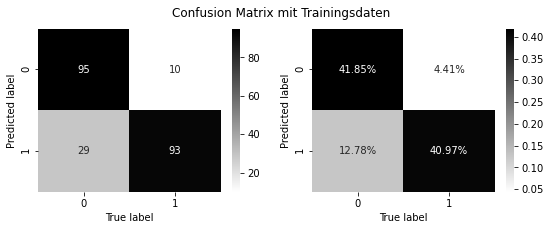

Richtig klassifiziert: 86.84%
Falsch klassifiziert: 13.16%


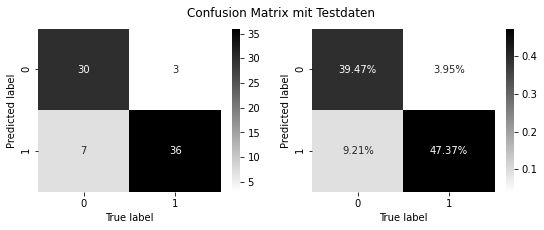

In [22]:
plot_confusion_matrix(confusion_matrix(y_train, clf.predict(X_train)), "Confusion Matrix mit Trainingsdaten")
plot_confusion_matrix(confusion_matrix(y_test, clf.predict(X_test)), "Confusion Matrix mit Testdaten")

In [23]:
k=10
model = svm.SVC(C = optimizer_acc.max["params"].get("C"), kernel = "linear", class_weight={0: optimizer_weight.max["params"].get("zeroWeight"), 1: 1})
model.fit(X_train, y_train)
scores = cross_val_score(model, data, output, cv=k)
scores.mean()

0.8083870967741935